<a href="https://colab.research.google.com/github/mraaheb/DataMining/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1 — Load the Preprocessed Dataset

We begin Phase 3 by loading the preprocessed dataset generated in Phase 2.  
This dataset is already cleaned and encoded, so it is ready for applying K-means clustering.


In [ ]:
import pandas as pd

df = pd.read_csv("lung_cancer_preprocessed.csv")
print(df.shape)
df.head()



(50000, 11)


,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,100000,2,1,0.660248,2,0,0,1,1,0,No
1,100001,0,0,0.127785,2,0,1,1,1,1,Yes
2,100002,2,0,0.004055,1,1,1,1,0,0,Yes
3,100003,2,0,0.440640,0,0,1,0,1,0,Yes
4,100004,0,0,0.444313,1,1,0,1,0,1,Yes


## Phase 3 – Part 2: K-Means Clustering

In this part, we apply K-Means clustering to discover natural groups in the preprocessed lung cancer dataset.  
We will:

1. Prepare the feature matrix by removing non-informative columns (ID and class label).
2. Standardize all numeric attributes so that they are on a comparable scale.
3. Apply K-Means with three different values of K (K = 2, 3, 4).
4. Evaluate and compare the clustering results using:
   - Inertia (within-cluster sum of squares / Elbow method)
   - Silhouette coefficient
5. Interpret the clusters and discuss what they reveal about patient risk profiles.


In [ ]:
import pandas as pd

# 1) Prepare feature matrix for K-Means
# Drop ID and class label, we don't want them in clustering
cols_to_drop = ['patient_id', 'lung_cancer']  # adjust if your column names differ
feature_cols = [c for c in df.columns if c not in cols_to_drop]

X = df[feature_cols]

print("Feature columns used for clustering:")
print(feature_cols)

print("\nShape of X:", X.shape)
print("\nData types:")
print(X.dtypes)

print("\nFirst 5 rows of features:")
X.head()


Feature columns used for clustering:
['age', 'gender', 'pack_years', 'radon_exposure', 'asbestos_exposure', 'secondhand_smoke_exposure', 'copd_diagnosis', 'alcohol_consumption', 'family_history']

Shape of X: (50000, 9)

Data types:
age                            int64
gender                         int64
pack_years                   float64
radon_exposure                 int64
asbestos_exposure              int64
secondhand_smoke_exposure      int64
copd_diagnosis                 int64
alcohol_consumption            int64
family_history                 int64
dtype: object

First 5 rows of features:


,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history
0,2,1,0.660248,2,0,0,1,1,0
1,0,0,0.127785,2,0,1,1,1,1
2,2,0,0.004055,1,1,1,1,0,0
3,2,0,0.440640,0,0,1,0,1,0
4,0,0,0.444313,1,1,0,1,0,1


In [ ]:
# ---------------------------------------------------------
# Step 2: Scale the features before applying K-Means
# K-Means is sensitive to feature scale, so we standardize.
# ---------------------------------------------------------

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easy display
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Shape after scaling:", X_scaled_df.shape)
X_scaled_df.head()


Shape after scaling: (50000, 9)


,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history
0,1.042532,1.003406,0.556701,1.226026,-0.993978,-1.002684,0.997363,-0.002446,-0.99932
1,-1.382750,-0.996606,-1.288746,1.226026,-0.993978,0.997324,0.997363,-0.002446,1.00068
2,1.042532,-0.996606,-1.717576,0.001053,1.006058,0.997324,0.997363,-1.225532,-0.99932
3,1.042532,-0.996606,-0.204431,-1.223919,-0.993978,0.997324,-1.002643,-0.002446,-0.99932
4,-1.382750,-0.996606,-0.191703,0.001053,1.006058,-1.002684,0.997363,-1.225532,1.00068


## K-Means Clustering with K = 2

In this section, we apply the K-Means algorithm using **K = 2** clusters.  
This will help us understand how the dataset behaves when divided into two groups.

### Steps performed:
- Fit K-Means with `n_clusters=2`
- Predict cluster labels
- Add the labels to the scaled dataset
- Compute two evaluation metrics:
  - **WCSS (Within-Cluster Sum of Squares)**: used for the Elbow Method
  - **Silhouette Score**: measures how well-separated the clusters are
- Display the first few rows including the new cluster label


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply K-means with K=2
k2 = KMeans(n_clusters=2, random_state=42)
clusters_2 = k2.fit_predict(X_scaled_df)

# Add cluster labels to the DataFrame
X_scaled_df["cluster_k2"] = clusters_2

# Evaluation metrics
wcss_k2 = k2.inertia_          # Elbow metric (within-cluster sum of squares)
silhouette_k2 = silhouette_score(X_scaled_df.drop("cluster_k2", axis=1), clusters_2)

print("K=2 Results:")
print("WCSS:", wcss_k2)
print("Silhouette Score:", silhouette_k2)

# Preview
X_scaled_df.head()


K=2 Results:
WCSS: 412338.27081007516
Silhouette Score: 0.08571893148660199


,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,cluster_k2
0,1.042532,1.003406,0.556701,1.226026,-0.993978,-1.002684,0.997363,-0.002446,-0.99932,1
1,-1.382750,-0.996606,-1.288746,1.226026,-0.993978,0.997324,0.997363,-0.002446,1.00068,1
2,1.042532,-0.996606,-1.717576,0.001053,1.006058,0.997324,0.997363,-1.225532,-0.99932,0
3,1.042532,-0.996606,-0.204431,-1.223919,-0.993978,0.997324,-1.002643,-0.002446,-0.99932,0
4,-1.382750,-0.996606,-0.191703,0.001053,1.006058,-1.002684,0.997363,-1.225532,1.00068,1


### 🔹 K-Means Clustering — K = 3

In this step, we apply **K-Means clustering with K = 3** to explore whether the dataset naturally forms three groups.  
We compute the following:

- **WCSS (Within-Cluster Sum of Squares)**: used for the Elbow method  
- **Silhouette Score**: used to measure clustering quality (closer to 1 = better)

After fitting the model, we add the cluster labels to the scaled dataset for further comparison and analysis.


In [ ]:
# Apply K-means with K=3
k3 = KMeans(n_clusters=3, random_state=42)
clusters_3 = k3.fit_predict(X_scaled_df)

# Add cluster labels to the DataFrame
X_scaled_df["cluster_k3"] = clusters_3

# Evaluation metrics
wcss_k3 = k3.inertia_
silhouette_k3 = silhouette_score(X_scaled_df.drop("cluster_k3", axis=1), clusters_3)

print("K=3 Results:")
print("WCSS:", wcss_k3)
print("Silhouette Score:", silhouette_k3)

# Preview
X_scaled_df.head()


K=3 Results:
WCSS: 382105.4256789614
Silhouette Score: 0.10035610284712551


,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,cluster_k2,cluster_k3
0,1.042532,1.003406,0.556701,1.226026,-0.993978,-1.002684,0.997363,-0.002446,-0.99932,1,2
1,-1.382750,-0.996606,-1.288746,1.226026,-0.993978,0.997324,0.997363,-0.002446,1.00068,1,1
2,1.042532,-0.996606,-1.717576,0.001053,1.006058,0.997324,0.997363,-1.225532,-0.99932,0,1
3,1.042532,-0.996606,-0.204431,-1.223919,-0.993978,0.997324,-1.002643,-0.002446,-0.99932,0,0
4,-1.382750,-0.996606,-0.191703,0.001053,1.006058,-1.002684,0.997363,-1.225532,1.00068,1,2


### K-means Clustering with K = 4

In this step, we apply K-means clustering with **K = 4** on the standardized features.  
We keep the same evaluation metrics used before:
- **WCSS (Within-Cluster Sum of Squares)**: used for the Elbow method.
- **Silhouette Score**: used to measure how well-separated and cohesive the clusters are.

This value of K (4) is our third partition size, so together with K = 2 and K = 3 it satisfies the project requirement of using at least three different K values.


In [ ]:
# Apply K-means with K=4
k4 = KMeans(n_clusters=4, random_state=42)
clusters_4 = k4.fit_predict(X_scaled_df)

# Add cluster labels to the DataFrame
X_scaled_df["cluster_k4"] = clusters_4

# Evaluation metrics
wcss_k4 = k4.inertia_  # Elbow metric (within-cluster sum of squares)
silhouette_k4 = silhouette_score(X_scaled_df.drop("cluster_k4", axis=1), clusters_4)

print("K=4 Results:")
print("WCSS:", wcss_k4)
print("Silhouette Score:", silhouette_k4)

# Preview
X_scaled_df.head()


K=4 Results:
WCSS: 385906.47033176466
Silhouette Score: 0.08480096744832522


,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,cluster_k2,cluster_k3,cluster_k4
0,1.042532,1.003406,0.556701,1.226026,-0.993978,-1.002684,0.997363,-0.002446,-0.99932,1,2,1
1,-1.382750,-0.996606,-1.288746,1.226026,-0.993978,0.997324,0.997363,-0.002446,1.00068,1,1,2
2,1.042532,-0.996606,-1.717576,0.001053,1.006058,0.997324,0.997363,-1.225532,-0.99932,0,1,0
3,1.042532,-0.996606,-0.204431,-1.223919,-0.993978,0.997324,-1.002643,-0.002446,-0.99932,0,0,3
4,-1.382750,-0.996606,-0.191703,0.001053,1.006058,-1.002684,0.997363,-1.225532,1.00068,1,2,1


In [19]:
# Collect previously computed metrics for K = 2, 3, 4
results_df = pd.DataFrame({
    "K": [2, 3, 4],
    "WCSS": [wcss_k2, wcss_k3, wcss_k4],
    "Silhouette": [silhouette_k2, silhouette_k3, silhouette_k4]
})

results_df


,K,WCSS,Silhouette
0,2,412338.270810,0.085719
1,3,382105.425679,0.100356
2,4,385906.470332,0.084801


### Comparison of K values (K = 2, 3, 4)

- **WCSS (within-cluster sum of squares)**  
  - K=2 → **412,338.27**  
  - K=3 → **382,105.43**  
  - K=4 → **385,906.47**  
  WCSS goes down when we move from K=2 to **K=3** (clusters become more compact), then slightly increases again at K=4, so the improvement stops after K=3.

- **Silhouette Score**  
  - K=2 → **0.0857**  
  - K=3 → **0.1004**  
  - K=4 → **0.0848**  
  The highest silhouette score is for **K=3**, which means clusters are better separated for K=3 than for K=2 or K=4.

- **Conclusion**  
  Considering both metrics together, **K=3 gives the best trade-off**: lowest WCSS and highest silhouette score.  
  For the remaining analysis, we consider **K=3 as the most appropriate number of clusters** for this dataset.


## 📊 Visualizations for K-means Clustering

Below are the required visualizations for evaluating and interpreting the clustering results:
1. **Elbow Method** – to analyze WCSS and help determine the optimal K.  
2. **Silhouette Scores** – to compare cluster quality across K=2,3,4.  
3. **Scatter Plots** – visualizing cluster separation for each K using two selected features.


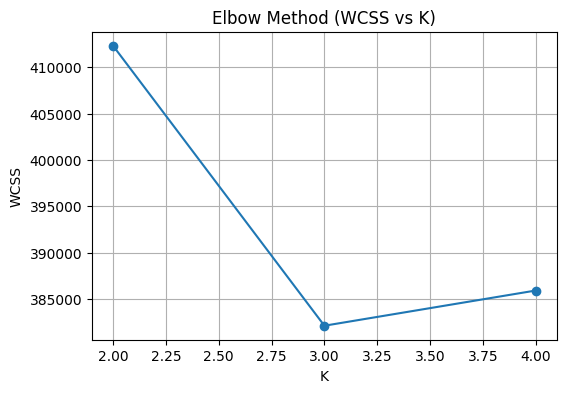

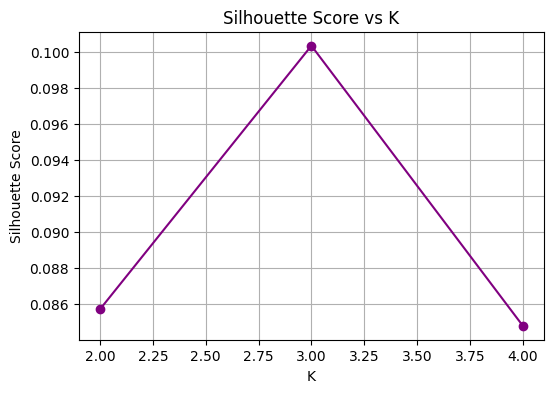

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Elbow Plot ---
plt.figure(figsize=(6,4))
plt.plot(results_df["K"], results_df["WCSS"], marker='o')
plt.title("Elbow Method (WCSS vs K)")
plt.xlabel("K")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

# --- Silhouette Plot ---
plt.figure(figsize=(6,4))
plt.plot(results_df["K"], results_df["Silhouette"], marker='o', color='purple')
plt.title("Silhouette Score vs K")
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


### Cluster Visualization using PCA (K = 2, 3, 4)

In this section, we visualize the K-means clustering results in a 2D PCA space.  
We use all scaled features to fit a PCA model (2 components), then plot the clusters for K = 2, 3, and 4.  
Each plot shows how the data points are distributed in terms of the first two principal components.


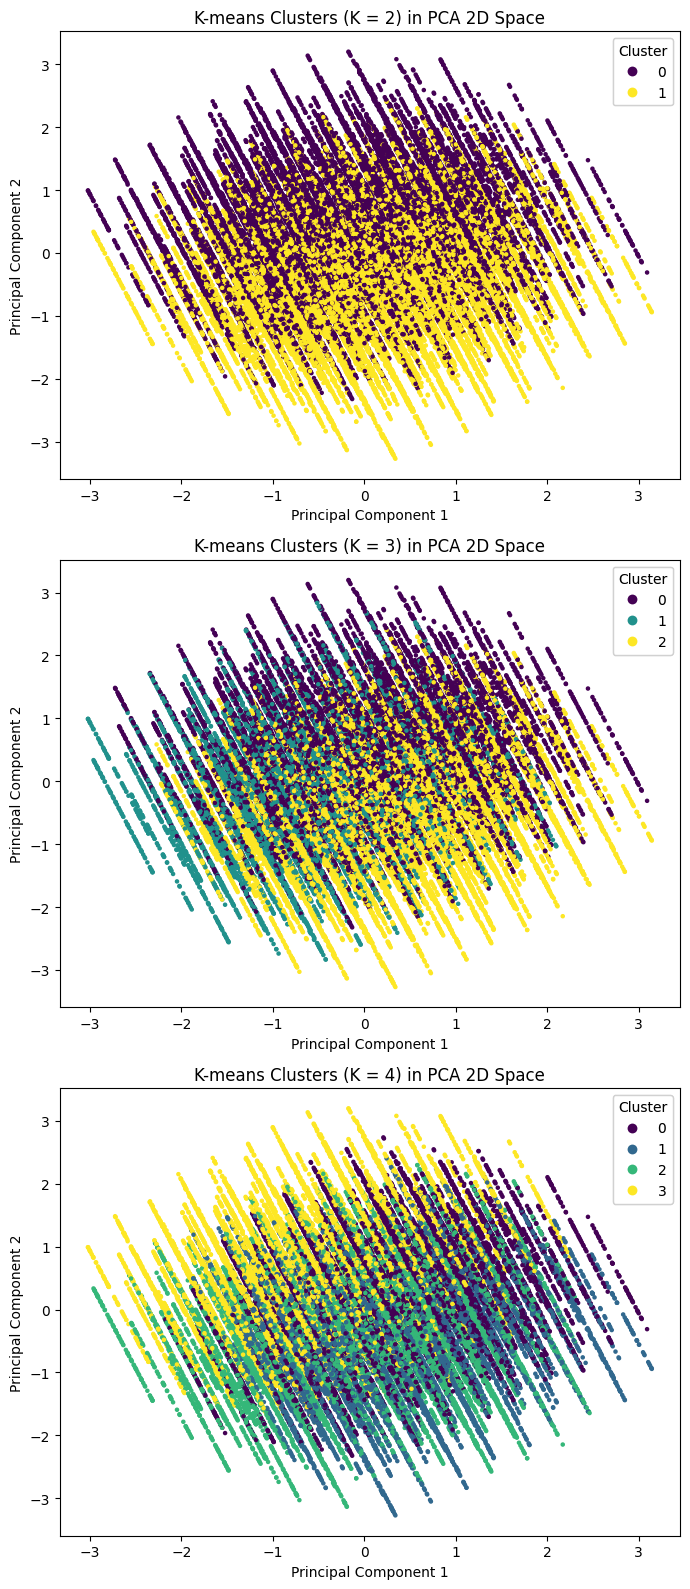

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1) Prepare data for PCA (use all feature columns, without the cluster labels)
feature_cols = [c for c in X_scaled_df.columns if not c.startswith("cluster_")]
X_features = X_scaled_df[feature_cols]

# 2) Apply PCA to reduce to 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_features)

# Put PCA result in a DataFrame for convenience
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["cluster_k2"] = X_scaled_df["cluster_k2"]
pca_df["cluster_k3"] = X_scaled_df["cluster_k3"]
pca_df["cluster_k4"] = X_scaled_df["cluster_k4"]

# 3) Plot clusters for K = 2, 3, 4 (three separate subplots)
fig, axes = plt.subplots(3, 1, figsize=(7, 16))

cluster_cols = [("cluster_k2", 2), ("cluster_k3", 3), ("cluster_k4", 4)]

for ax, (col, k) in zip(axes, cluster_cols):
    scatter = ax.scatter(
        pca_df["PC1"],
        pca_df["PC2"],
        c=pca_df[col],
        s=5
    )
    ax.set_title(f"K-means Clusters (K = {k}) in PCA 2D Space")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")

    legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
    ax.add_artist(legend1)

plt.tight_layout()
plt.show()
